### Dashboard 2 - Learner Analysis
- Learning Progress
- Performance
- Behavior

__Graphs__
- Registration tracking board: Time in days vs Number of Learners
- Learning progress tracking board: Course Progress in % vs Number of Learners in %
- Performance tracking board (for each assessment): Grades in % vs avg/min/max learner assessment performance
- Learning behavior tracking board - Inactive learners in the past 14 days: Course Progress in % vs Number of learners in %

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_student_regi = pd.read_csv("../../data/studentRegistration.csv")
course_modules = df_student_regi['code_module'].unique()
course_modules

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

__Plot the registration dates for different courses by group__

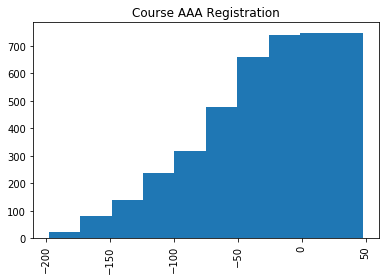

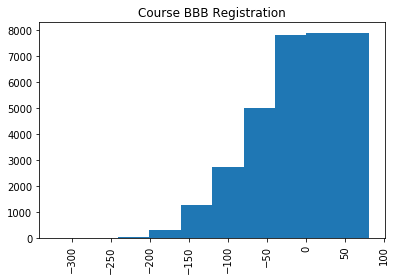

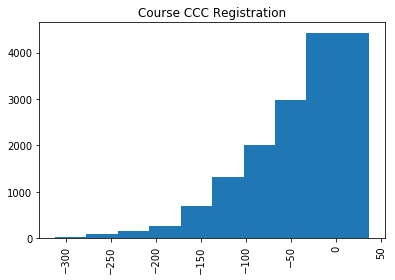

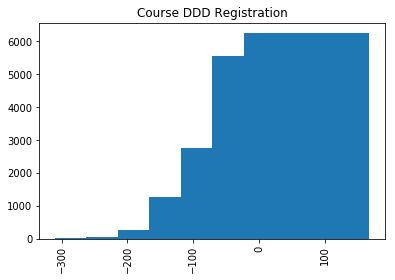

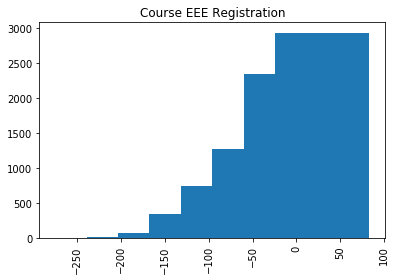

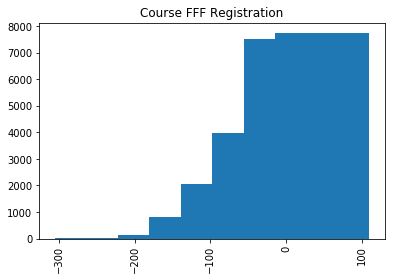

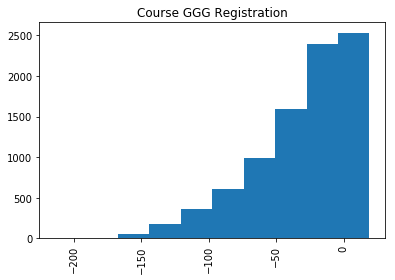

In [3]:
groups = df_student_regi.groupby(['code_module'])

regi_hists = groups['date_registration'].hist(cumulative=True, histtype='bar', 
                                              by=('Course '+df_student_regi['code_module']+' Registration'))


__Make a customized function to select individual course module__

### Course Progression and the number of learners 
- we observe that in the studentAssessment file, we don't have the code module for each assessment 
- we can find ```code_module```, ```id_assessment``` pair in another file, assessments.csv
- thus, we can merge the two dataframes on ```id_assessment``` to give each row a ```code_module``` field

In [4]:
df_stu_assess = pd.read_csv('../../data/studentAssessment.csv')
df_stu_assess.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [5]:
df_assess = pd.read_csv('../../data/assessments.csv')
df_assess.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [23]:
df_assess_merged = pd.merge(df_stu_assess, df_assess[['code_module', 'id_assessment', 'weight']], 
                            on='id_assessment', how='left')
df_assess_merged.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,weight
0,1752,11391,18,0,78.0,AAA,10.0
1,1752,28400,22,0,70.0,AAA,10.0
2,1752,31604,17,0,72.0,AAA,10.0
3,1752,32885,26,0,69.0,AAA,10.0
4,1752,38053,19,0,79.0,AAA,10.0


### Find out, for each course module, how many unique assessments are there. 

- The idea is we want to use the number assessments each learner takes to estimate the progress he/she has made on a given module
- However, we have to validate our assumption that the increase in ```id_assessment``` represents progression in time
- If our assumption is true, it means that the number of students taking an earlier assessment will always be greater than or equal to the number of students taking the assessments later on 

In [24]:
dict_assess = {}
for course in course_modules:
    ids = df_assess_merged[df_assess_merged['code_module'] == course]['id_assessment'].unique()
    dict_assess[course] = ids
    print(f'course module {course}, {len(ids)} unique assessments')

course module AAA, 10 unique assessments
course module BBB, 38 unique assessments
course module CCC, 18 unique assessments
course module DDD, 35 unique assessments
course module EEE, 12 unique assessments
course module FFF, 48 unique assessments
course module GGG, 27 unique assessments


In [25]:
dict_assess

{'AAA': array([1752, 1753, 1754, 1755, 1756, 1758, 1759, 1760, 1761, 1762]),
 'BBB': array([14984, 14985, 14986, 14987, 14988, 14989, 14991, 14992, 14993,
        14994, 14995, 14996, 14997, 14998, 14999, 15000, 15001, 15003,
        15004, 15005, 15006, 15007, 15008, 15009, 15010, 15011, 15012,
        15013, 15015, 15016, 15017, 15018, 15019, 15020, 15021, 15022,
        15023, 15024]),
 'CCC': array([24282, 24283, 24284, 24285, 24286, 24287, 24288, 24289, 24290,
        24291, 24292, 24293, 24294, 24295, 24296, 24297, 24298, 24299]),
 'DDD': array([25334, 25335, 25336, 25337, 25338, 25339, 25340, 25341, 25342,
        25343, 25344, 25345, 25346, 25347, 25348, 25349, 25350, 25351,
        25352, 25353, 25354, 25355, 25356, 25357, 25358, 25359, 25360,
        25361, 25362, 25363, 25364, 25365, 25366, 25367, 25368]),
 'EEE': array([30709, 30710, 30711, 30712, 30714, 30715, 30716, 30717, 30719,
        30720, 30721, 30722]),
 'FFF': array([34860, 34861, 34862, 34863, 34864, 34865, 34866

In [26]:
def verify_assessIds(course):
    ids = dict_assess[course]
    for i in range(len(ids)-1):
        previous_assess = df_assess_merged[df_assess_merged['id_assessment'] == ids[i]]
        later_assess = df_assess_merged[df_assess_merged['id_assessment'] == ids[i+1]]
        if len(previous_assess) < len(later_assess):
            print(f'exception module {course}\tassessId {ids[i]}\tstudents {len(previous_assess)}\tassessId {ids[i+1]}\tstudents {len(later_assess)}')
        
for course in course_modules:
    verify_assessIds(course)

exception module AAA	assessId 1756	students 298	assessId 1758	students 337
exception module BBB	assessId 14989	students 766	assessId 14991	students 1189
exception module BBB	assessId 14995	students 870	assessId 14996	students 1695
exception module BBB	assessId 15001	students 1034	assessId 15003	students 1490
exception module BBB	assessId 15007	students 1136	assessId 15008	students 1189
exception module BBB	assessId 15013	students 684	assessId 15015	students 1054
exception module BBB	assessId 15019	students 769	assessId 15020	students 1776
exception module CCC	assessId 24285	students 583	assessId 24286	students 1346
exception module CCC	assessId 24289	students 706	assessId 24290	students 747
exception module CCC	assessId 24290	students 747	assessId 24291	students 1428
exception module CCC	assessId 24294	students 916	assessId 24295	students 1917
exception module CCC	assessId 24298	students 1094	assessId 24299	students 1168
exception module DDD	assessId 25339	students 503	assessId 25340	s

__For whatever reasons, some students only take partial quizzes. Therefore, we have to reject the previous assumption that ```id_assessment``` is ordered by time, so we could not use them as indicators for a course's progression. On the other hand, we can use the number of quizzes a student is able to complete to measure the pregress that student has made for this course.__

In [54]:
def progress_plot(course, store):
    ids = dict_assess[course]
    total = len(ids)
    progress = []
    
    students = df_assess_merged['id_student'].unique()
    df_module = df_assess_merged[df_assess_merged['code_module']==course]
    for s in students:
        prog = df_module[df_module['id_student']==s]['id_assessment'].unique().shape[0]
        for i in range(prog):
            progress.append(i/total)
            store.append(i/total)
    
    progress.sort(reverse=False)
    ax = pd.Series(progress).hist(cumulative=False, histtype='bar', bins=5)
    ax.set_xlabel('course progress in proportion')
    ax.set_ylabel('number of learners')
    ax.set_title(f'Course Module - {course}')
    

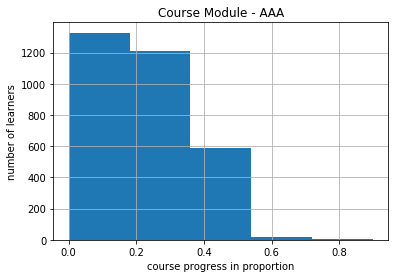

In [55]:
store_a = []
progress_plot('AAA', store_a)

In [65]:
df_AAA = df_assess_merged[df_assess_merged['code_module']=='AAA']
print(f"all students who take the quizzess {df_AAA['id_student'].shape[0]}")
print(pd.Series(store_a).value_counts(bins=5))
print(pd.Series(store_a).value_counts(bins=5) / df_AAA['id_student'].shape[0])

all students who take the quizzess 3149
(-0.0019, 0.18]    1327
(0.18, 0.36]       1207
(0.36, 0.54]        588
(0.54, 0.72]         20
(0.72, 0.9]           7
dtype: int64
(-0.0019, 0.18]    0.421404
(0.18, 0.36]       0.383296
(0.36, 0.54]       0.186726
(0.54, 0.72]       0.006351
(0.72, 0.9]        0.002223
dtype: float64


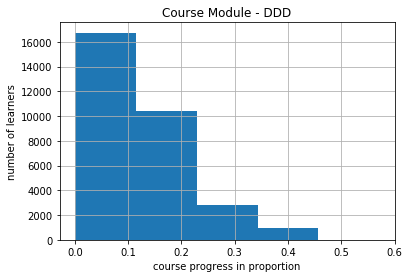

In [57]:
progress_plot('DDD',[])

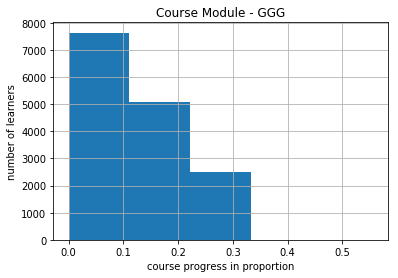

In [58]:
progress_plot('GGG',[])

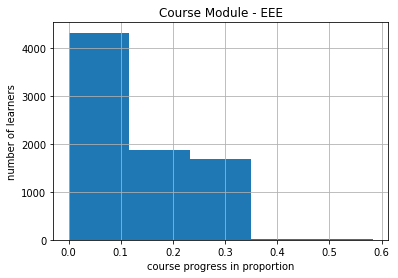

In [59]:
progress_plot('EEE',[])

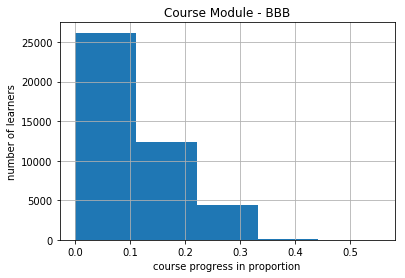

In [60]:
progress_plot('BBB',[])

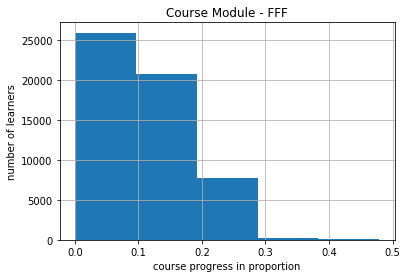

In [61]:
store_f = []
progress_plot('FFF', store_f)

In [68]:
df_FFF = df_assess_merged[df_assess_merged['code_module']=='FFF']
print(f"all students who take the quizzess {df_FFF['id_student'].shape[0]}")
print(pd.Series(store_f).value_counts(bins=5))
print(pd.Series(store_f).value_counts(bins=5) / df_FFF['id_student'].shape[0])


all students who take the quizzess 54815
(-0.001479, 0.0958]    25948
(0.0958, 0.192]        20832
(0.192, 0.288]          7736
(0.288, 0.383]           217
(0.383, 0.479]            82
dtype: int64
(-0.001479, 0.0958]    0.473374
(0.0958, 0.192]        0.380042
(0.192, 0.288]         0.141129
(0.288, 0.383]         0.003959
(0.383, 0.479]         0.001496
dtype: float64


In [17]:
def progress_plot_non_cumulative(course):
    ids = dict_assess[course]
    total = len(ids)
    progress = []
    
    students = df_assess_merged['id_student'].unique()
    df_module = df_assess_merged[df_assess_merged['code_module']==course]
    for s in students:
        prog = df_module[df_module['id_student']==s]['id_assessment'].unique().shape[0]
        progress.append(prog/total)
    
    progress.sort(reverse=False)
    ax = pd.Series(progress).hist(cumulative=False, histtype='bar', bins=total)
    ax.set_xlabel('course progress in proportion')
    ax.set_ylabel('number of learners')
    ax.set_title(f'Course Module - {course}')

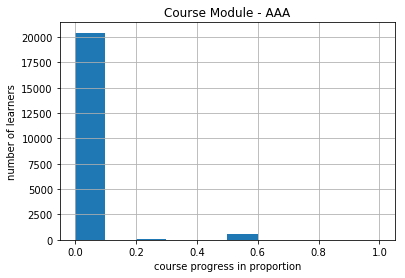

In [18]:
progress_plot_non_cumulative('AAA')

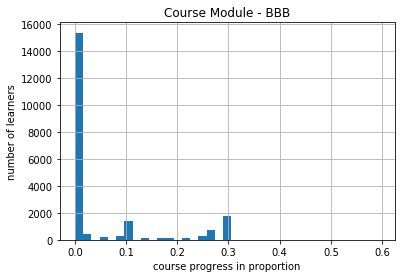

In [19]:
progress_plot_non_cumulative('BBB')

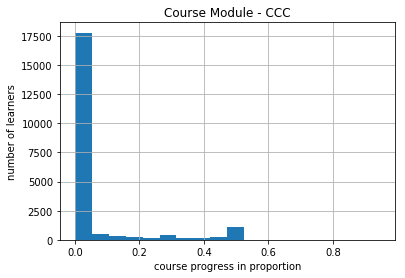

In [20]:
progress_plot_non_cumulative('CCC')

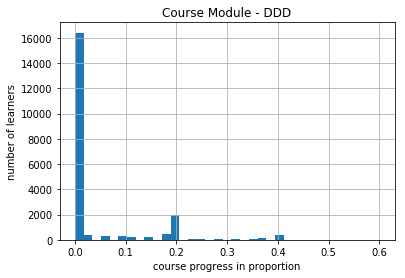

In [21]:
progress_plot_non_cumulative('DDD')

In [22]:
progress_plot_non_cumulative('GGG')

ZeroDivisionError: division by zero

### Find out the grade statistics 
- make a boxplot for each quiz based on the ```assessment_id```
- we want to know, for each quiz, what is the avg, max and min score

In [ ]:
df_AAA = df_assess_merged[df_assess_merged['code_module']=='AAA']
df_AAA.boxplot(by='id_assessment', column=['score'], grid=False)

In [ ]:
import seaborn as sns

def grade_boxplot(course):
    df_course = df_assess_merged[df_assess_merged['code_module']==course]
    ax = sns.boxplot(x="id_assessment", y="score", data=df_course)
    ax.set_xlabel('course ID')
    ax.set_ylabel('score')
    ax.set_title(f'Course Module - {course}')

grade_boxplot('GGG')

In [ ]:
grade_boxplot('AAA')

In [ ]:
grade_boxplot('FFF')

In [ ]:
grade_boxplot('BBB')

# A Demo for the Learning Analytics Dashboard - Let's go! 

In [ ]:
from PyQt5.QtWidgets import QApplication
from dashboard import LearnerTabs
import sys

if __name__ == "__main__":
    app = QApplication(sys.argv)
    tabs = LearnerTabs()
    tabs.show()
    app.exec()